<a href="https://colab.research.google.com/github/Subhrajyoti-Dutta/QSTP/blob/main/QSTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the Image Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf

In [3]:
def read_labels(path_to_labels):
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

def read_images(path_to_data):
    with open(path_to_data, 'rb') as f:
        everything = np.fromfile(f, dtype=np.uint8)
        images = np.reshape(everything, (-1, 3, 96, 96))
        images = np.transpose(images, (0, 3, 2, 1))
        return images

##Retrieving training data

In [4]:
path_to_train_imgs = r"/content/drive/MyDrive/ML-AI/QSTP/train_X.bin"
path_to_train_labels = r"/content/drive/MyDrive/ML-AI/QSTP/train_y.bin"

In [5]:
Xtrain = read_images(path_to_train_imgs)
Ytrain_labels = read_labels(path_to_train_labels) - 1
Ytrain = np.zeros((5000,10),dtype=np.uint8)
Ytrain[np.arange(5000).reshape(-1,1),Ytrain_labels.reshape(-1,1)] = 1

##Retrieving test data

In [6]:
path_to_test_imgs = r"/content/drive/MyDrive/ML-AI/QSTP/test_X.bin"
path_to_test_labels = r"/content/drive/MyDrive/ML-AI/QSTP/test_y.bin"

In [7]:
Xtest = read_images(path_to_test_imgs)
Ytest_labels = read_labels(path_to_test_labels) - 1
Ytest = np.zeros((8000,10),dtype=np.uint8)
Ytest[np.arange(8000).reshape(-1,1),Ytest_labels.reshape(-1,1)] = 1

##Shuffling the data

In [8]:
Xtrain = tf.convert_to_tensor(Xtrain,dtype = tf.uint8)
Ytrain = tf.convert_to_tensor(Ytrain,dtype = tf.uint8)
Xtest  = tf.convert_to_tensor(Xtest, dtype = tf.uint8)
Ytest  = tf.convert_to_tensor(Ytest, dtype = tf.uint8)

In [9]:
indices = tf.random.shuffle(tf.range(5000))
Xtrain = tf.gather(Xtrain,indices)
Ytrain = tf.gather(Ytrain,indices)

In [10]:
indices = tf.random.shuffle(tf.range(8000))
Xtest = tf.gather(Xtest,indices)
Ytest = tf.gather(Ytest,indices)

In [11]:
print(f"Shape of Xtrain = {Xtrain.shape}")
print(f"Shape of Ytrain = {Ytrain.shape}")
print(f"Shape of Xtest  = {Xtest.shape}")
print(f"Shape of Ytest  = {Ytest.shape}")

Shape of Xtrain = (5000, 96, 96, 3)
Shape of Ytrain = (5000, 10)
Shape of Xtest  = (8000, 96, 96, 3)
Shape of Ytest  = (8000, 10)


#Save the data as .npz file for future use

Also we are saving so that we can start from middle

Uncomment the following cell to save the file midway

In [12]:
# import shutil
# np.savez("STL10-Data",Xtrain = Xtrain, Xtest = Xtest, Ytrain = Ytrain, Ytest = Ytest)
# shutil.copy("/content/STL10-Data.npz","/content/drive/MyDrive/ML-AI/QSTP/Part-1")

#Building and training the model

##Full-Supervised Approach

If the model is already trained then uncomment the following cell and start directly from here

In [13]:
# npzfile = np.load('/content/drive/MyDrive/ML-AI/QSTP/Part-1/STL10-Data.npz')
# Xtrain = npzfile['Xtrain']
# Ytrain = npzfile['Ytrain']

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape= Xtrain.shape[1:]),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24*24, activation = "relu"),
    tf.keras.layers.Dense(24*24, activation = 'relu'),
    tf.keras.layers.Dense(10,    activation = 'softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 576)               17842752  
_________________________________________________________________
dense_1 (Dense)              (None, 576)               3

In [15]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy()
    )

In [16]:
model.fit(
    Xtrain,
    Ytrain,
    epochs = 10,
    callbacks = tf.keras.callbacks.EarlyStopping(
        monitor   = 'val_loss',
        patience  = 1,                                                
        min_delta = 0.01,
        mode      = 'min'
        ),
    validation_split = 0.2,
    batch_size = 125
    )

Epoch 1/10
32/32 [==============================] - 90s 3s/step - loss: 5.4331 - val_loss: 0.3055
Epoch 2/10
32/32 [==============================] - 88s 3s/step - loss: 0.2415 - val_loss: 0.2837
Epoch 3/10
32/32 [==============================] - 87s 3s/step - loss: 0.1544 - val_loss: 0.3094


###We are saving the trained model for future use

If you want to save the model midway then uncomment the following cell

In [17]:
# model.save("/content/drive/MyDrive/ML-AI/QSTP/Part-2")

###Testing the efficency of Model

If the model is already trained then uncomment the following two cells and start directly from here

In [18]:
# npzfile = np.load('/content/drive/MyDrive/ML-AI/QSTP/Part-1/STL10-Data.npz')
# Xtest  = npzfile['Xtest']
# Ytest  = npzfile['Ytest']

In [19]:
# model = tf.keras.models.load_model("/content/drive/MyDrive/ML-AI/QSTP/Part-2")

In [20]:
Ypred = model.predict(Xtest)                        #Predicting the y values using the trained model on Xtest

In [22]:
metric = tf.keras.metrics.BinaryAccuracy()
metric.update_state(Ytest,Ypred)
print(f"Accuracy of the model = {metric.result().numpy()}")

Accuracy of the model = 0.9015473127365112


##Semi-Supervised Approach (using Pseudo Labelling)

Model 1

In [23]:
model2a = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape= Xtrain.shape[1:]),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24*24, activation = "relu"),
    tf.keras.layers.Dense(24*24, activation = 'relu'),
    tf.keras.layers.Dense(10,    activation = 'softmax'),
])
model2a.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 94, 94, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 576)               17842752  
_________________________________________________________________
dense_4 (Dense)              (None, 576)              

In [24]:
model2a.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy()
    )

In [25]:
model2a.fit(
    Xtrain,
    Ytrain,
    epochs = 10,
    callbacks = tf.keras.callbacks.EarlyStopping(
        monitor   = 'val_loss',
        patience  = 1,                                                
        min_delta = 0.01,
        mode      = 'min'
        ),
    validation_split = 0.1,
    batch_size = 125
    )

Epoch 1/10
36/36 [==============================] - 95s 3s/step - loss: 6.6714 - val_loss: 0.3327
Epoch 2/10
36/36 [==============================] - 95s 3s/step - loss: 0.2601 - val_loss: 0.2656
Epoch 3/10
36/36 [==============================] - 95s 3s/step - loss: 0.1562 - val_loss: 0.2776


In [26]:
Ypred = model2a.predict(Xtest)

In [ ]:
pseudo_labels = np.sum(Ytest.numpy()*Ypred,axis=1) > 0.99
Add_Xtest = Xtest[pseudo_labels]
Add_Ytest = Ytest[pseudo_labels]

In [31]:
New_Xtrain = tf.concat([Xtrain, Add_Xtest], axis = 0)
New_Ytrain = tf.concat([Ytrain, Add_Ytest], axis = 0)
New_Xtrain.shape, New_Ytrain.shape

(TensorShape([5629, 96, 96, 3]), TensorShape([5629, 10]))

Building another model with pseudo labels included

In [32]:
model2b = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape= Xtrain.shape[1:]),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24*24, activation = "relu"),
    tf.keras.layers.Dense(24*24, activation = 'relu'),
    tf.keras.layers.Dense(10,    activation = 'softmax'),
])
model2b.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 94, 94, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 576)               17842752  
_________________________________________________________________
dense_7 (Dense)              (None, 576)              

In [33]:
model2b.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy()
    )

In [34]:
model2b.fit(
    New_Xtrain,
    New_Ytrain,
    epochs = 10,
    callbacks = tf.keras.callbacks.EarlyStopping(
        monitor   = 'val_loss',
        patience  = 1,                                                
        min_delta = 0.01,
        mode      = 'min'
        ),
    validation_split = 0.1,
    batch_size = 125
    )

Epoch 1/10
41/41 [==============================] - 108s 3s/step - loss: 8.0820 - val_loss: 0.1556
Epoch 2/10
41/41 [==============================] - 107s 3s/step - loss: 0.2498 - val_loss: 0.0883
Epoch 3/10
41/41 [==============================] - 107s 3s/step - loss: 0.1606 - val_loss: 0.0669
Epoch 4/10
41/41 [==============================] - 107s 3s/step - loss: 0.0825 - val_loss: 0.0644


In [35]:
Ypred_final = model2b.predict(Xtest)

In [36]:
metric = tf.keras.metrics.BinaryAccuracy()
metric.update_state(Ytest,Ypred_final)
print(f"Accuracy of the model = {metric.result().numpy()}")

Accuracy of the model = 0.891385018825531


In [44]:
from PIL import Image

Prediction on image: car
Actual Image:


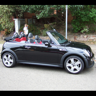

In [82]:
labels = ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']

index = np.random.randint(0,8000)
img = Xtest[index,:,:,:].numpy()
img_pred = tf.argmax(model2b.predict(np.expand_dims(img,axis=0)), axis = 1)
img = Image.fromarray(img, "RGB")
print("Prediction on image:", labels[img_pred.numpy()[0]])
print("Actual Image:")
img